In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('./final_dataset.csv')

In [4]:
# Set display options to show all columns if requested
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# View the first few rows of the dataset
df.head()

,leagueId,queueType,tier,rank,summonerId,summonerName.x,leaguePoints,wins,losses,veteran,inactive,freshBlood,hotStreak,participantId,win.x,item0,item1,item2,item3,item4,item5,item6,kills,deaths,assists,largestKillingSpree,largestMultiKill,killingSprees,longestTimeSpentLiving,doubleKills,tripleKills,quadraKills,pentaKills,unrealKills,totalDamageDealt,magicDamageDealt,physicalDamageDealt,trueDamageDealt,largestCriticalStrike,totalDamageDealtToChampions,magicDamageDealtToChampions,physicalDamageDealtToChampions,trueDamageDealtToChampions,totalHeal,totalUnitsHealed,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,visionScore,timeCCingOthers,totalDamageTaken,magicalDamageTaken,physicalDamageTaken,trueDamageTaken,goldEarned,goldSpent,turretKills,inhibitorKills.x,totalMinionsKilled,neutralMinionsKilled,neutralMinionsKilledTeamJungle,neutralMinionsKilledEnemyJungle,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,sightWardsBoughtInGame,wardsPlaced,wardsKilled,firstBloodKill,firstBloodAssist,firstTowerKill,firstTowerAssist,firstInhibitorKill,firstInhibitorAssist,combatPlayerScore,objectivePlayerScore,totalPlayerScore,totalScoreRank,playerScore0,playerScore1,playerScore2,playerScore3,playerScore4,playerScore5,playerScore6,playerScore7,playerScore8,playerScore9,perk0,perk0Var1,perk0Var2,perk0Var3,perk1,perk1Var1,perk1Var2,perk1Var3,perk2,perk2Var1,perk2Var2,perk2Var3,perk3,perk3Var1,perk3Var2,perk3Var3,perk4,perk4Var1,perk4Var2,perk4Var3,perk5,perk5Var1,perk5Var2,perk5Var3,perkPrimaryStyle,perkSubStyle,statPerk0,statPerk1,statPerk2,platformId,accountId,summonerName.y,currentPlatformId,currentAccountId,matchHistoryUri,profileIcon,creepsPerMinDeltas_010,xpPerMinDeltas_010,goldPerMinDeltas_010,csDiffPerMinDeltas_010,damageTakenPerMinDeltas_010,damageTakenDiffPerMinDeltas_010,creepsPerMinDeltas_1020,xpPerMinDeltas_1020,goldPerMinDeltas_1020,csDiffPerMinDeltas_1020,damageTakenPerMinDeltas_1020,damageTakenDiffPerMinDeltas_1020,role,lane,champBan,gameId,gameDuration,teamId,win.y,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills.y,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,championId,spell1Id,spell2Id
0,9c4c4013-c4de-4cb9-b874-7588092307b2,RANKED_SOLO_5x5,PLATINUM,IV,nrJ2dXeFsEUU0uDltSEG2LBX6wRFbSrOR6lJQCOGYSvoXQ,VemNovinhaaSqN,66,20,22,False,False,False,False,4,False,3157,3905,3853,3111,1033,0,3364,1,13,10,0,1,0,251,0,0,0,0,0,34231,29232,4987,11,0,14417,13127,1279,11,2077,1,12927,152,152,38,61,21801,8112,12185,1503,8107,7550,0,0,39,0,0,0,126,12,2,0,14,8,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8229,1318,0,0,8226,250,555,0,8233,17,50,0,8237,608,0,0,8347,0,0,0,8345,3,0,0,8200,8300.0,5008,5008,5001,BR1,ZOxd3A10Mvn36m2f2rv4b_sr-d0oBhEC2v-c079SHdFvtRM,VemNovinhaaSqN,BR1,ZOxd3A10Mvn36m2f2rv4b_sr-d0oBhEC2v-c079SHdFvtRM,/v1/stats/player_history/BR1/205035069,785,0.8,269.4,227.6,NaN,464.0,NaN,2.0,333.1,283.4,NaN,610.5,NaN,DUO_SUPPORT,BOTTOM,35,1943650882,1931,100,Fail,True,True,False,False,False,True,4,0,0,0,0,1,0,25,3,4
1,9c4c4013-c4de-4cb9-b874-7588092307b2,RANKED_SOLO_5x5,PLATINUM,IV,nrJ2dXeFsEUU0uDltSEG2LBX6wRFbSrOR6lJQCOGYSvoXQ,VemNovinhaaSqN,66,20,22,False,False,False,False,3,True,1400,2031,3047,3078,1052,1042,3340,8,1,5,5,2,2,618,2,0,0,0,0,108286,12198,90601,5486,0,9372,1080,7740,552,7338,1,7603,16707,1713,9,11,15090,1626,12733,730,8970,8343,0,0,15,112,77,12,218,12,0,0,4,0,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8005,856,429,426,9111,1080,260,0,9104,10,10,0,8014,327,0,0,8275,14,0,0,8232,3,30,0,8000,8200.0,5005,5008,5003,BR1,ZOxd3A10Mvn36m2f2rv4b_sr-d0oBhEC2v-c079SHdFvtRM,VemNovinhaaSqN,BR1,ZOxd3A10Mvn36m2f2rv4b_sr-d0oBhEC2v-c079SHdFvtRM,/v1/stats/player_history/BR1/205035069,3385,0.0,356.7,368.3,-0.1,478.4,-422.00,1.5,570.4,476.7,0.50,1030.6,-121.7,NONE,JUNGLE,555,1820861915,1210,100,Win,True,False,True,False,True,False,6,1,0,3,0,1,0,24,11,4
2,9c4c4013-c4de-4cb9-b874-7588092307b2,RANKED_SOLO_

In [5]:
# Show dataset information, along with its dimensions
print(df.info(),'\n')
print(f"Dataset dimensions: {df.shape}\n")

# View the data types of each column
print("Data types of each column:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243374 entries, 0 to 243373
Columns: 159 entries, leagueId to spell2Id
dtypes: bool(15), float64(13), int64(114), object(17)
memory usage: 270.9+ MB
None 

Dataset dimensions: (243374, 159)

Data types of each column:
leagueId                             object
queueType                            object
tier                                 object
rank                                 object
summonerId                           object
summonerName.x                       object
leaguePoints                          int64
wins                                  int64
losses                                int64
veteran                                bool
inactive                               bool
freshBlood                             bool
hotStreak                              bool
participantId                         int64
win.x                                  bool
item0                                 int64
item1                       

In [6]:
# Count the number of unique values for each column
unique_counts = df.nunique()
# Show the number of unique values for each column
print("\n----- Number of unique values for each column -----")
for col, count in unique_counts.items():
    print(f"{col}: {count}")

# Store column names with 1 unique value
single_value_columns = []
for col, count in unique_counts.items():
    if count == 1:
        single_value_columns.append(col)

# Show the columns with only one unique value, along with their unique value
print("\n----- Columns with only one unique value -----")
for col in single_value_columns:
    print(f"Unique value in {col}: {df[col].unique()[0]}")


----- Number of unique values for each column -----
leagueId: 4447
queueType: 1
tier: 9
rank: 4
summonerId: 27576
summonerName.x: 27593
leaguePoints: 153
wins: 745
losses: 739
veteran: 2
inactive: 1
freshBlood: 2
hotStreak: 2
participantId: 10
win.x: 2
item0: 203
item1: 202
item2: 198
item3: 197
item4: 198
item5: 193
item6: 6
kills: 47
deaths: 32
assists: 56
largestKillingSpree: 28
largestMultiKill: 6
killingSprees: 13
longestTimeSpentLiving: 1921
doubleKills: 14
tripleKills: 9
quadraKills: 4
pentaKills: 3
unrealKills: 1
totalDamageDealt: 116313
magicDamageDealt: 78942
physicalDamageDealt: 96276
trueDamageDealt: 27752
largestCriticalStrike: 2298
totalDamageDealtToChampions: 40472
magicDamageDealtToChampions: 30884
physicalDamageDealtToChampions: 32183
trueDamageDealtToChampions: 8522
totalHeal: 24683
totalUnitsHealed: 33
damageSelfMitigated: 45114
damageDealtToObjectives: 35346
damageDealtToTurrets: 13563
visionScore: 163
timeCCingOthers: 256
totalDamageTaken: 43147
magicalDamageTaken

In [7]:
# Drop the columns with only one unique value because they do not provide useful information
df.drop(columns=single_value_columns, inplace=True)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
# Print the number of missing values in columns with missing values
missing_values = missing_values[missing_values > 0]
print("\n----- Columns with missing values -----")
for col, count in missing_values.items():
    print(f"{col}: {count} missing values")

# Show the head of the dataset for the columns with missing values
print("\n----- Head of the dataset for columns with missing values -----")
for col in missing_values.index:
    print(f"{col}:\n{df[col].head()}\n")


----- Columns with missing values -----
firstInhibitorKill: 18656 missing values
firstInhibitorAssist: 18656 missing values
perkSubStyle: 62 missing values
platformId: 8621 missing values
csDiffPerMinDeltas_010: 54597 missing values
damageTakenDiffPerMinDeltas_010: 54597 missing values
csDiffPerMinDeltas_1020: 54597 missing values
damageTakenDiffPerMinDeltas_1020: 54597 missing values

----- Head of the dataset for columns with missing values -----
firstInhibitorKill:
0    False
1    False
2    False
3    False
4    False
Name: firstInhibitorKill, dtype: object

firstInhibitorAssist:
0    False
1    False
2    False
3    False
4    False
Name: firstInhibitorAssist, dtype: object

perkSubStyle:
0    8300.0
1    8200.0
2    8200.0
3    8200.0
4    8200.0
Name: perkSubStyle, dtype: float64

platformId:
0    BR1
1    BR1
2    BR1
3    BR1
4    BR1
Name: platformId, dtype: object

csDiffPerMinDeltas_010:
0    NaN
1   -0.1
2    3.2
3    NaN
4   -1.2
Name: csDiffPerMinDeltas_010, dtype: floa

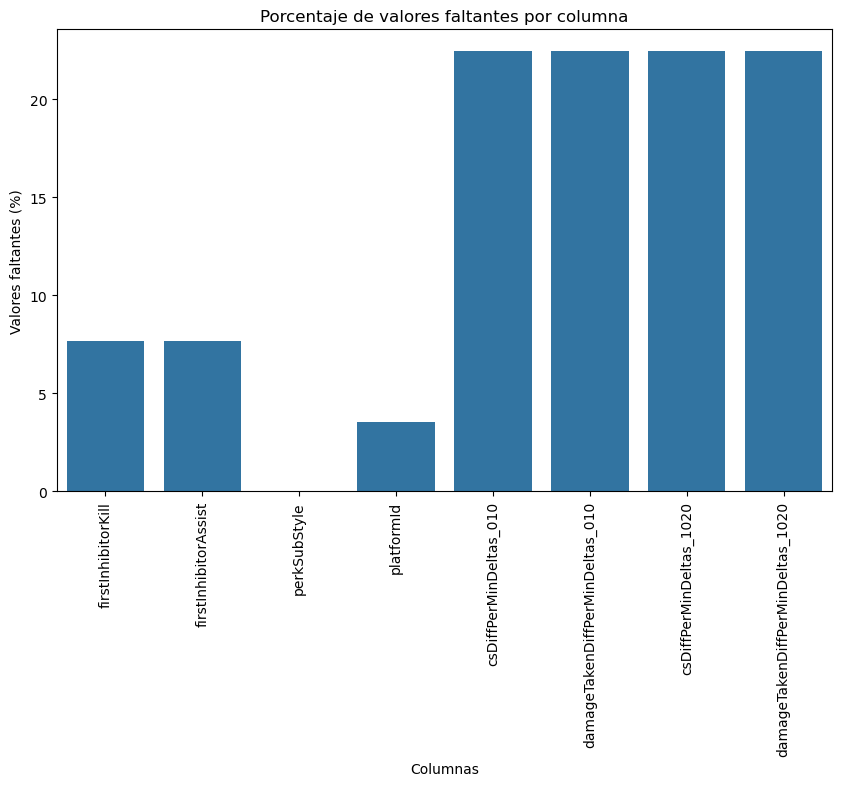

In [9]:
# Plot the missing values percentage for the column if it is greater than 0
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Porcentaje de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Valores faltantes (%)')
plt.show()

In [10]:
# Remove columns related to advanced or finished game for training the model later
# Using a txt file to specify the columns to drop
try:
    with open('mid_game_model_drop.txt', 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines] # Remove newline characters and strip whitespace
        lines = [line for line in lines if line] # Filter out empty lines
except FileNotFoundError:
    print('The file "mid_game_model_drop.txt" was not found. Please check the file path.')
    lines = []
except IOError as e:
    print(f'An error occurred while reading the file: {e}')
    lines = []

# Working with a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Drop the columns listed in the file
if lines:
    for line in lines:
        try:
            df_copy.drop(columns=[line], inplace=True)
        except KeyError:
            print(f'Column "{line}" not found in the DataFrame.')
        except Exception as e:
            print(f'An error occurred while dropping the column "{line}": {e}')
else:
    print('No columns were found to drop. Please check the contents of "mid_game_model_drop.txt".')

# Check the remaining columns
print("***** DATASET FOR MID GAME PREDICTION *****")
print("\n----- Remaining columns after dropping -----")
print(df_copy.head())
print("\n##### Number of columns after dropping:", len(df_copy.columns))

***** DATASET FOR MID GAME PREDICTION *****

----- Remaining columns after dropping -----
       tier  veteran  hotStreak  win.x  item0  firstBloodKill  firstTowerKill  firstTowerAssist  creepsPerMinDeltas_010  xpPerMinDeltas_010  goldPerMinDeltas_010  csDiffPerMinDeltas_010  damageTakenPerMinDeltas_010  damageTakenDiffPerMinDeltas_010  creepsPerMinDeltas_1020  xpPerMinDeltas_1020  goldPerMinDeltas_1020  csDiffPerMinDeltas_1020  damageTakenPerMinDeltas_1020  damageTakenDiffPerMinDeltas_1020         role    lane  firstBlood  firstTower  firstDragon  firstRiftHerald  spell1Id  spell2Id
0  PLATINUM    False      False  False   3157           False           False             False                     0.8               269.4                 227.6                     NaN                        464.0                              NaN                      2.0                333.1                  283.4                      NaN                         610.5                               NaN  DU

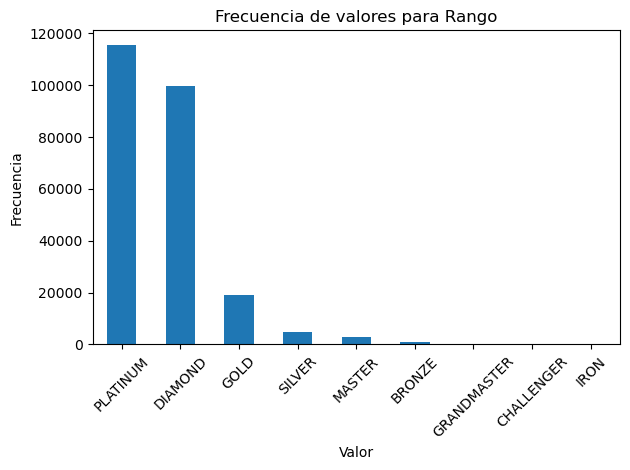

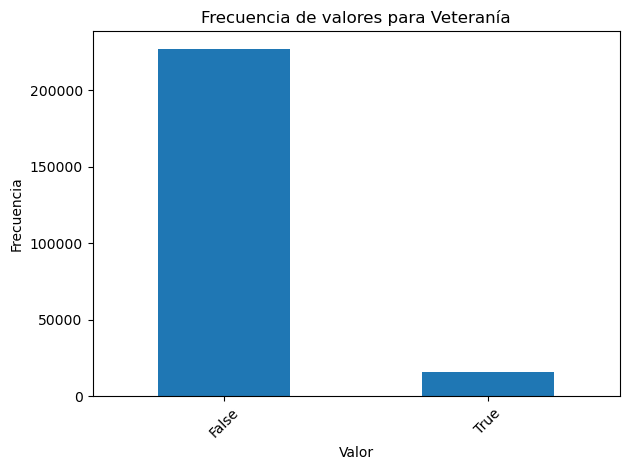

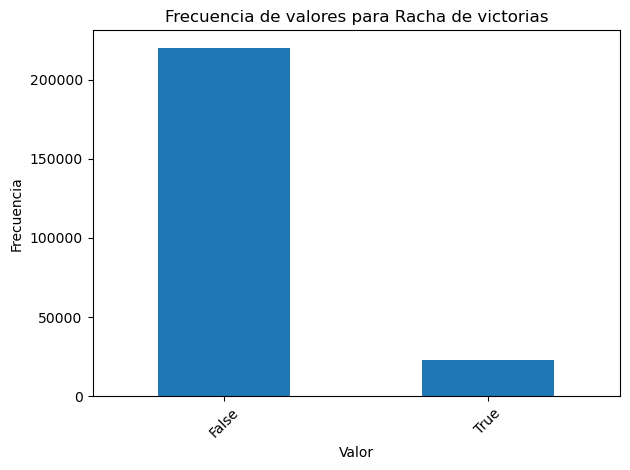

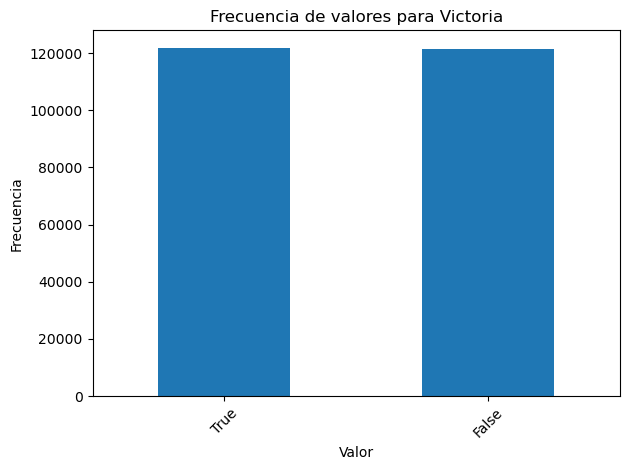

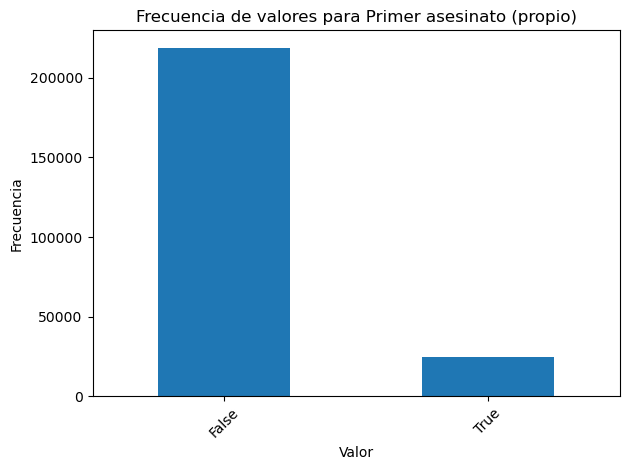

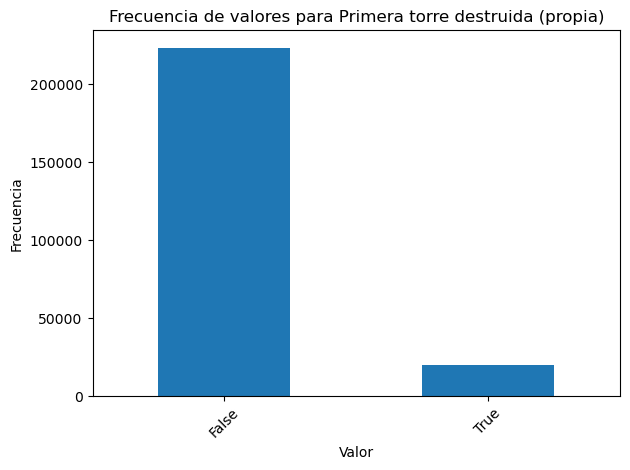

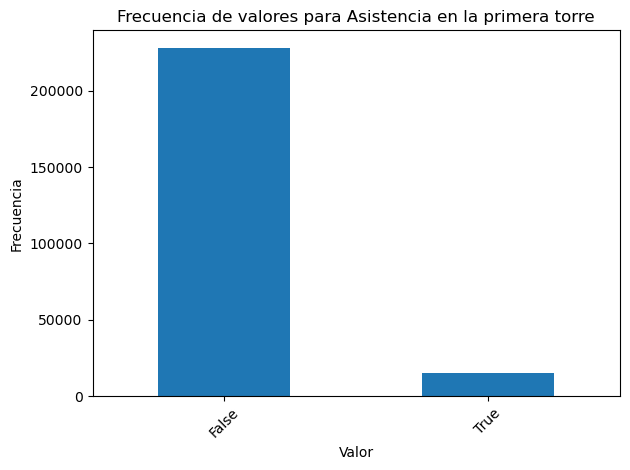

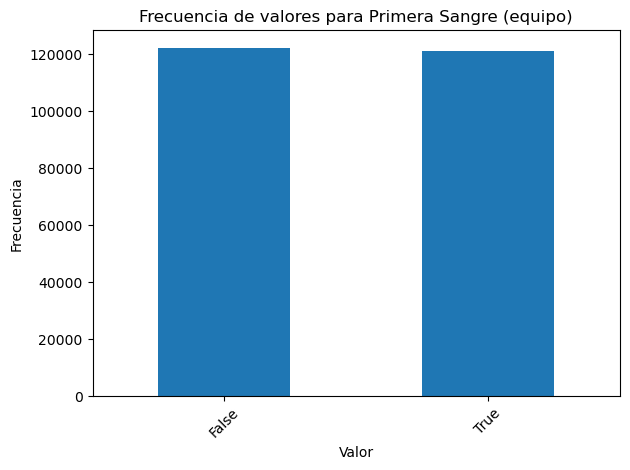

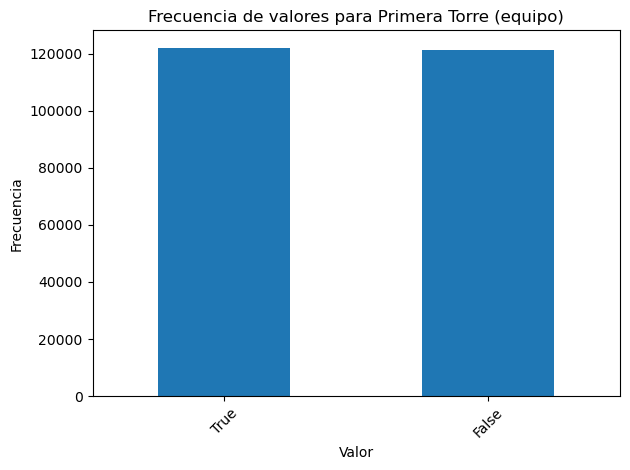

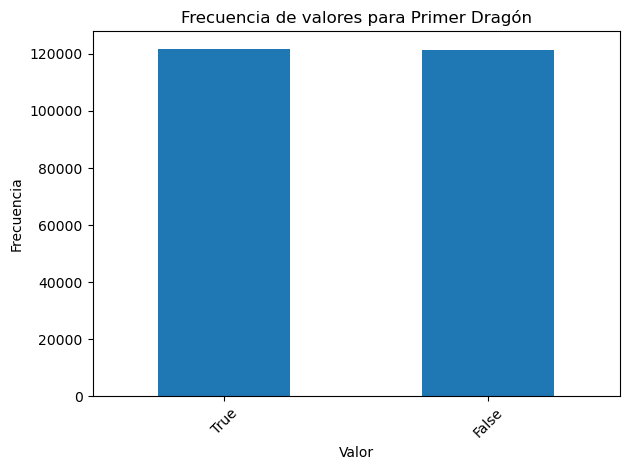

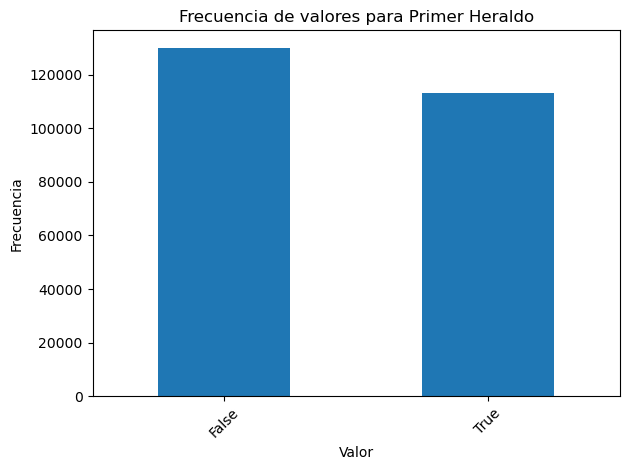

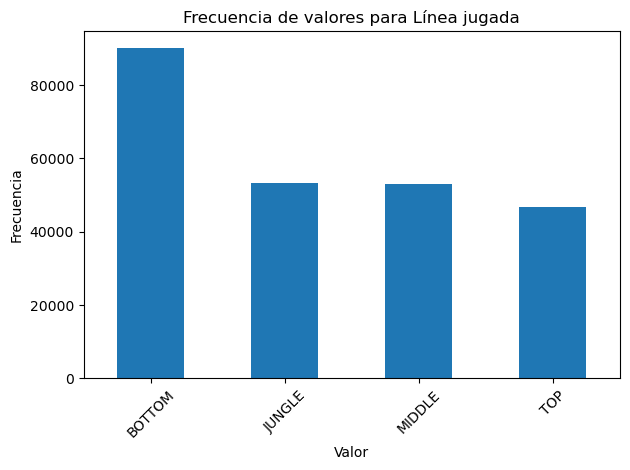

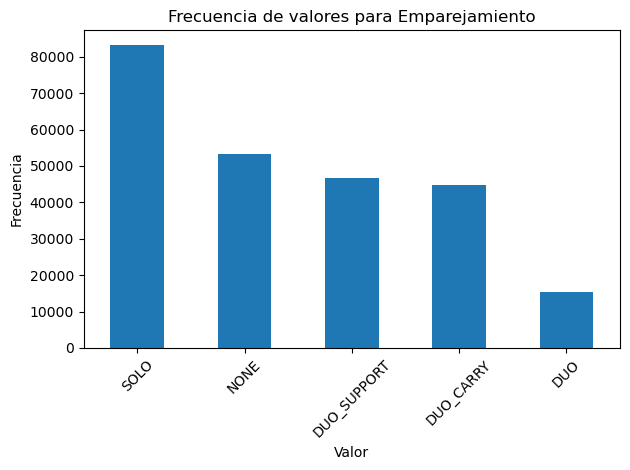

In [11]:
# Store categorical column names to check frequency of values
categorical_columns = ['tier','veteran','hotStreak','win.x','firstBloodKill','firstTowerKill','firstTowerAssist',
                        'firstBlood','firstTower','firstDragon','firstRiftHerald','lane','role']

# Link categorical columns to their respective names for plotting
categorical_column_names_for_plot = {
    'tier': 'Rango',
    'veteran': 'Veteranía',
    'hotStreak': 'Racha de victorias',
    'win.x': 'Victoria',
    'firstBloodKill': 'Primer asesinato (propio)',
    'firstTowerKill': 'Primera torre destruida (propia)',
    'firstTowerAssist': 'Asistencia en la primera torre',
    'firstBlood': 'Primera Sangre (equipo)',
    'firstTower': 'Primera Torre (equipo)',
    'firstDragon': 'Primer Dragón',
    'firstRiftHerald': 'Primer Heraldo',
    'lane': 'Línea jugada',
    'role': 'Emparejamiento'
}

# Plot the frequency of the values for categorical columns
for col in categorical_columns:
    plt.figure()
    df_copy[col].value_counts().plot(kind='bar')
    plt.title(f'Frecuencia de valores para {categorical_column_names_for_plot[col]}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

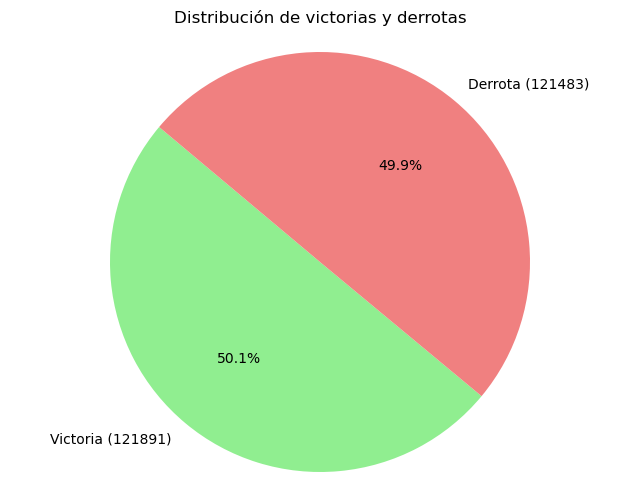

In [ ]:
# Count the number of wins and losses
win_counts = df['win.x'].value_counts()
# Map boolean values to labels
labels_dict = {True: 'Victoria', False: 'Derrota'}

# Pie chart to show the distribution of wins and losses
# Using the labels dictionary to create labels for the pie chart
# Using the win_counts to get the count of wins and losses
# Using the first index of win_counts to determine the color order
labels = f'{labels_dict[True]} ({win_counts[True]})', f'{labels_dict[False]} ({win_counts[False]})'
colors = ['lightgreen', 'lightcoral'] if win_counts.index[0] else ['lightcoral', 'lightgreen']
sizes = win_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de victorias y derrotas')
plt.axis('equal')  # Equal aspect ratio ensuring that the pie chart is circular
plt.show()

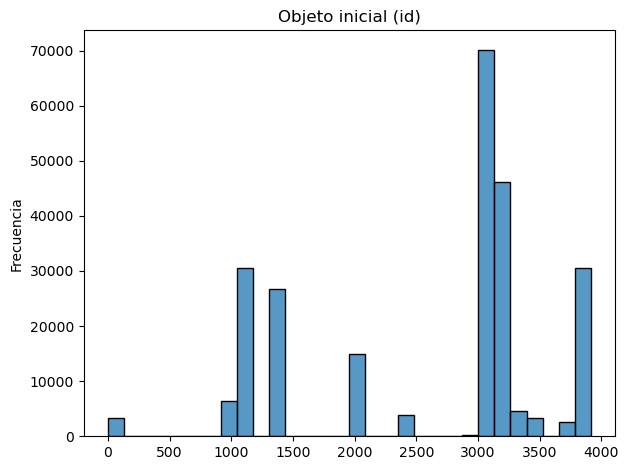

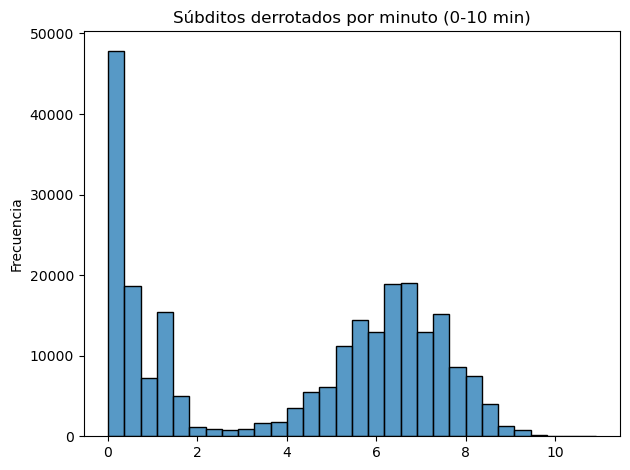

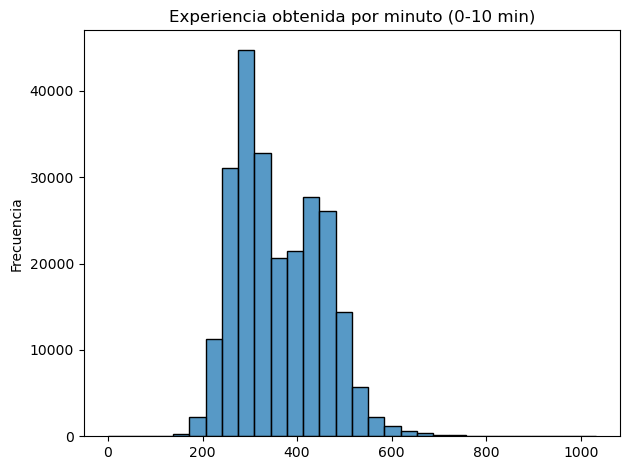

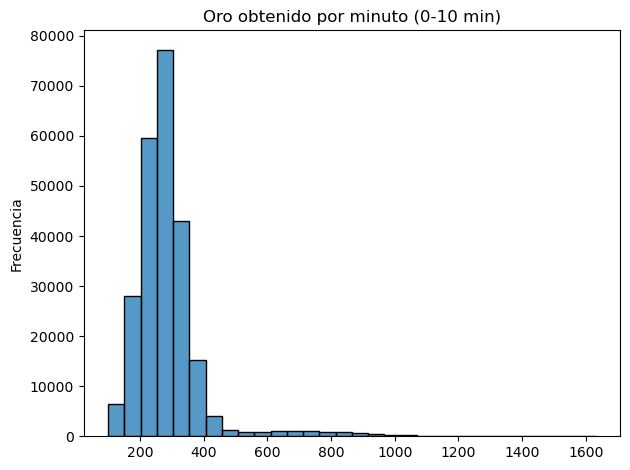

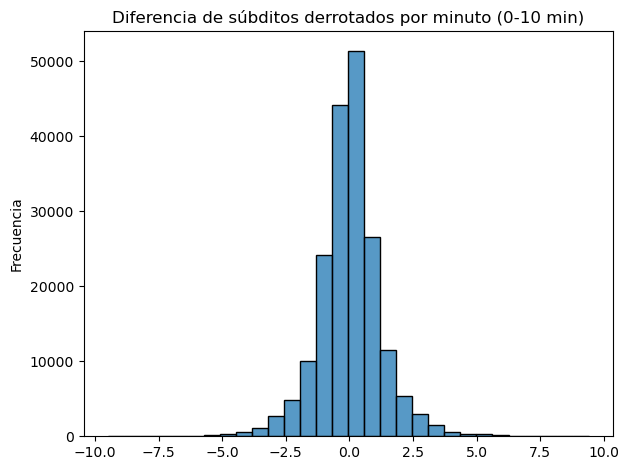

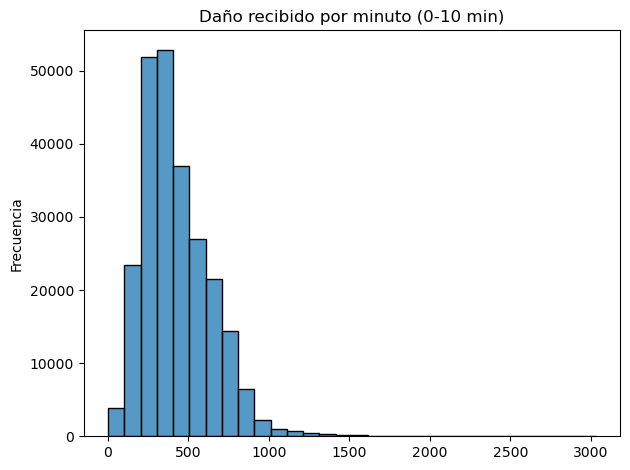

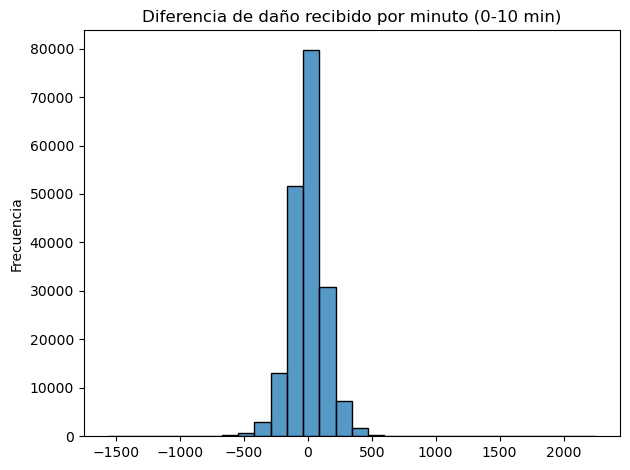

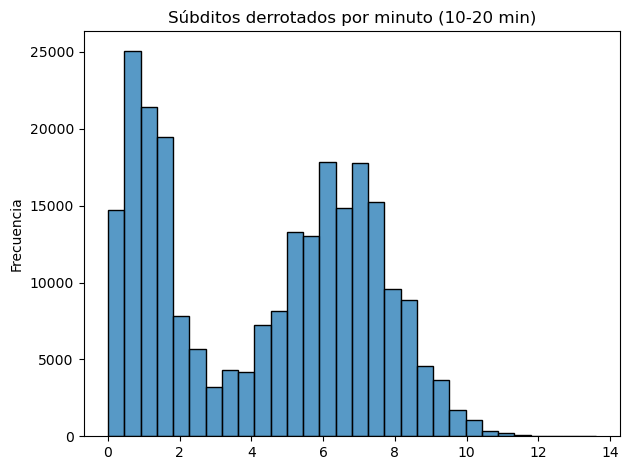

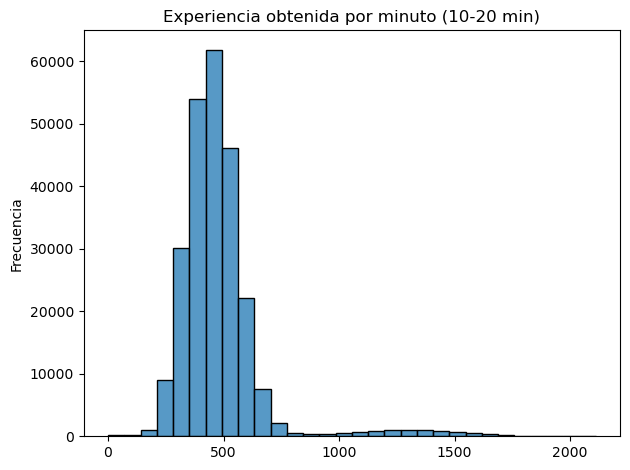

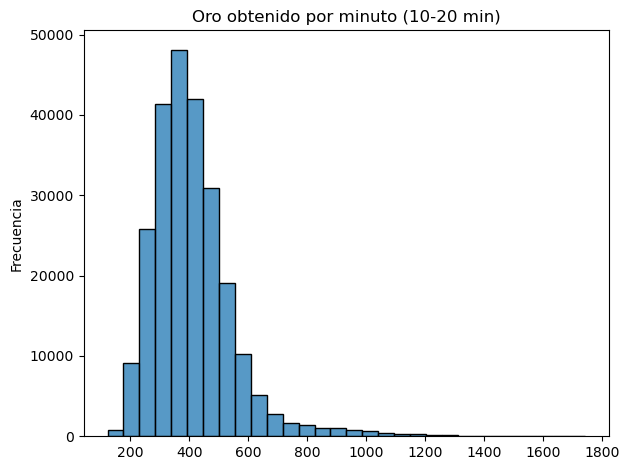

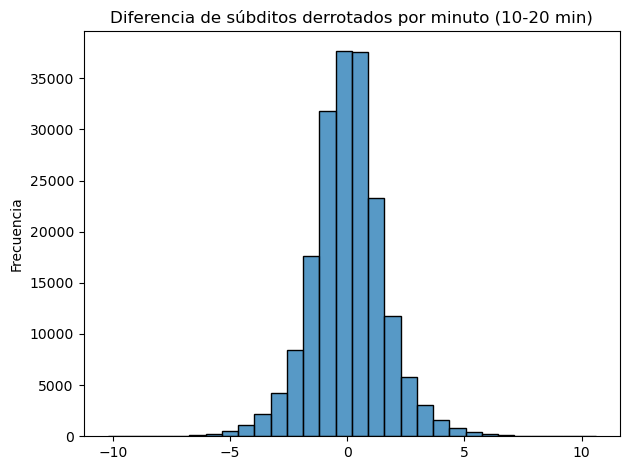

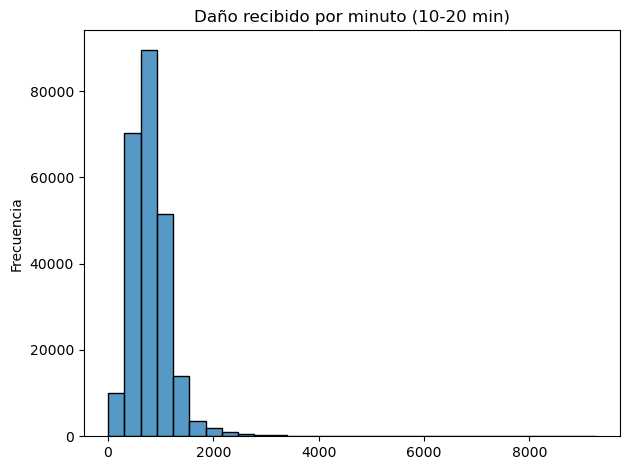

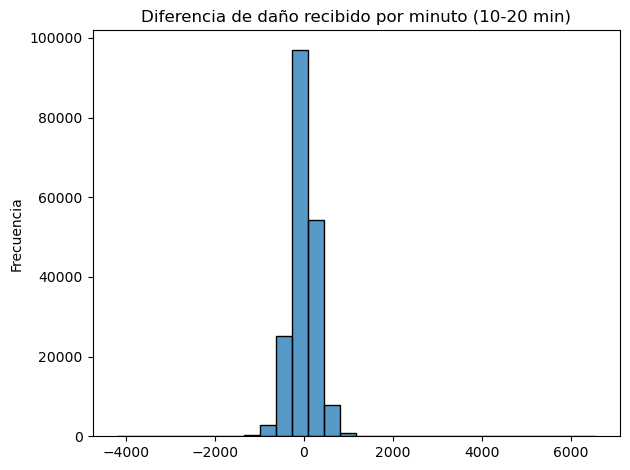

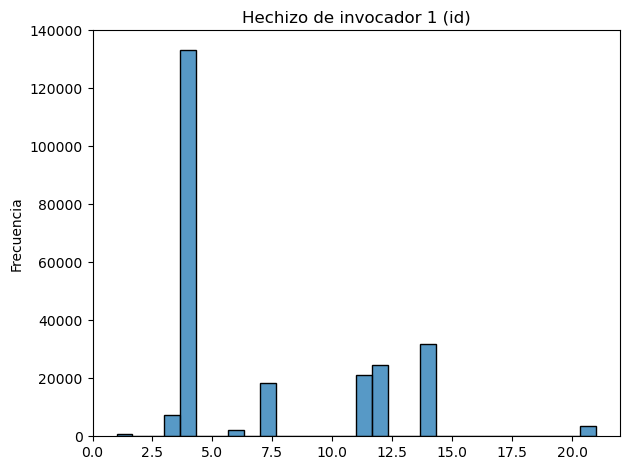

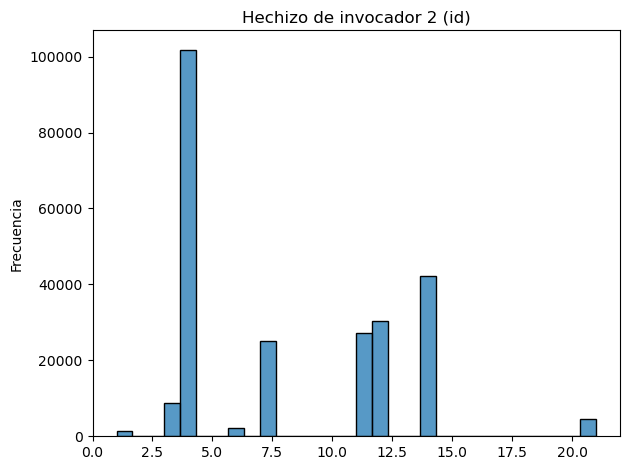

In [13]:
# Store the numeric column names
numeric_columns = ['item0','creepsPerMinDeltas_010','xpPerMinDeltas_010','goldPerMinDeltas_010','csDiffPerMinDeltas_010',
                    'damageTakenPerMinDeltas_010','damageTakenDiffPerMinDeltas_010','creepsPerMinDeltas_1020',
                    'xpPerMinDeltas_1020','goldPerMinDeltas_1020','csDiffPerMinDeltas_1020','damageTakenPerMinDeltas_1020',
                    'damageTakenDiffPerMinDeltas_1020','spell1Id','spell2Id']

# Link numeric columns to their respective names for plotting
numeric_column_names_for_plot = {
    'item0': 'Objeto inicial (id)',
    'creepsPerMinDeltas_010': 'Súbditos derrotados por minuto (0-10 min)',
    'xpPerMinDeltas_010': 'Experiencia obtenida por minuto (0-10 min)',
    'goldPerMinDeltas_010': 'Oro obtenido por minuto (0-10 min)',
    'csDiffPerMinDeltas_010': 'Diferencia de súbditos derrotados por minuto (0-10 min)',
    'damageTakenPerMinDeltas_010': 'Daño recibido por minuto (0-10 min)',
    'damageTakenDiffPerMinDeltas_010': 'Diferencia de daño recibido por minuto (0-10 min)',
    'creepsPerMinDeltas_1020': 'Súbditos derrotados por minuto (10-20 min)',
    'xpPerMinDeltas_1020': 'Experiencia obtenida por minuto (10-20 min)',
    'goldPerMinDeltas_1020': 'Oro obtenido por minuto (10-20 min)',
    'csDiffPerMinDeltas_1020': 'Diferencia de súbditos derrotados por minuto (10-20 min)',
    'damageTakenPerMinDeltas_1020': 'Daño recibido por minuto (10-20 min)',
    'damageTakenDiffPerMinDeltas_1020': 'Diferencia de daño recibido por minuto (10-20 min)',
    'spell1Id': 'Hechizo de invocador 1 (id)',
    'spell2Id': 'Hechizo de invocador 2 (id)'
}

# Plot the distribution of numeric columns using a histogram
for col in numeric_columns:
    plt.figure()
    sns.histplot(df_copy[col], bins=30, kde=False)
    plt.title(numeric_column_names_for_plot[col])
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


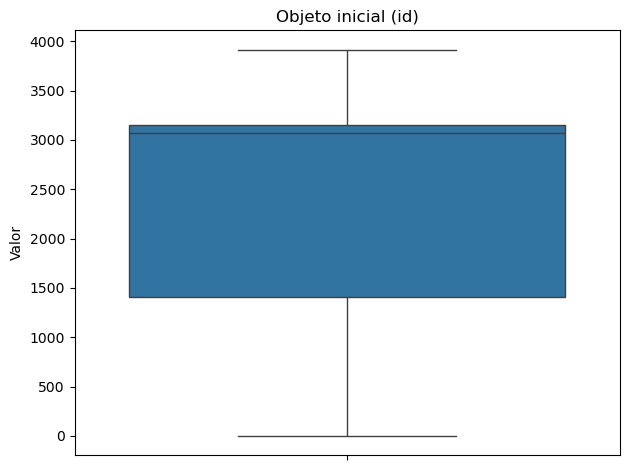

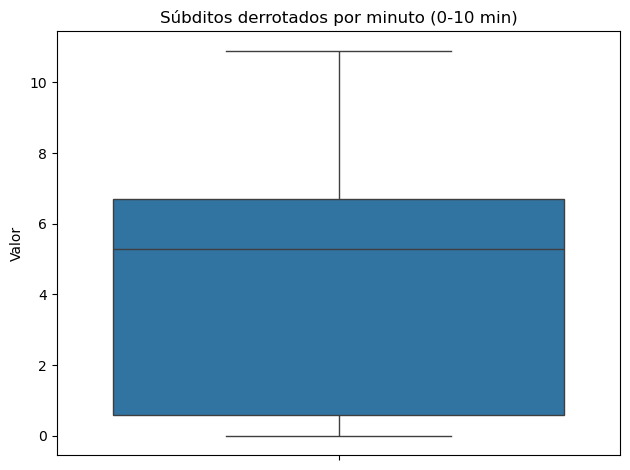

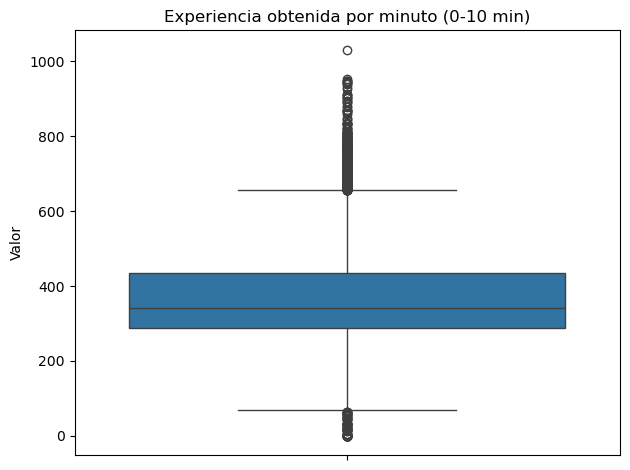

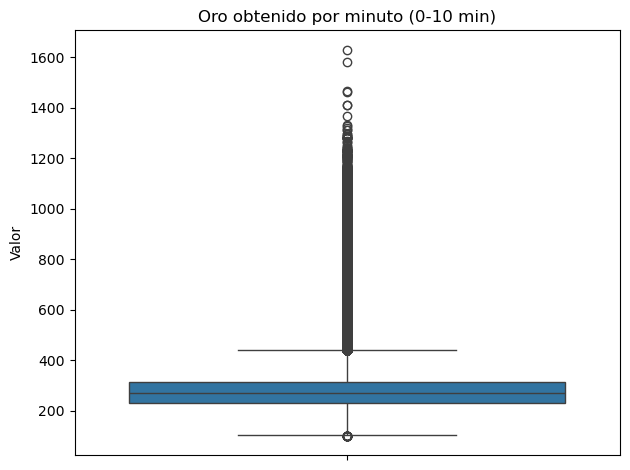

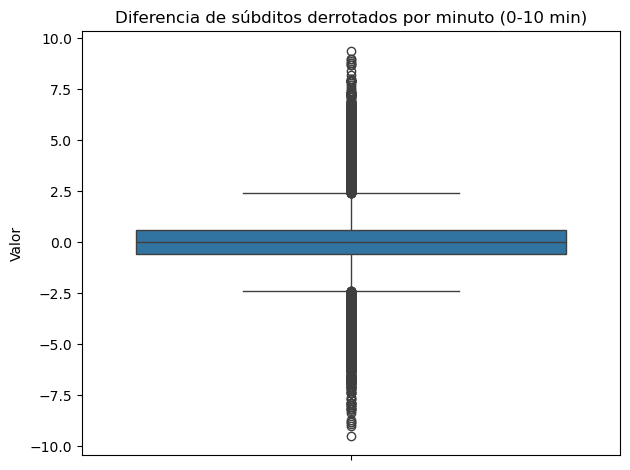

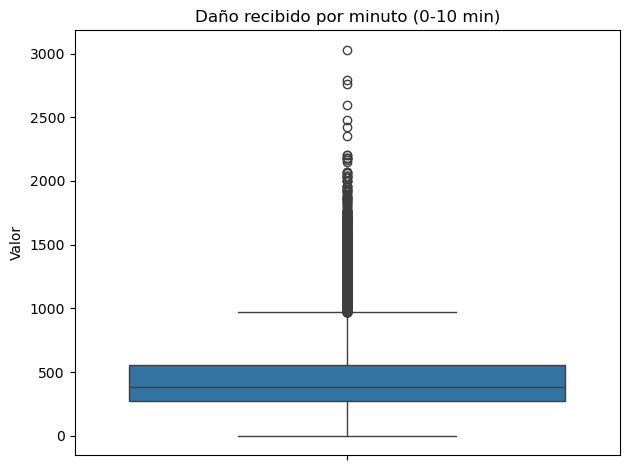

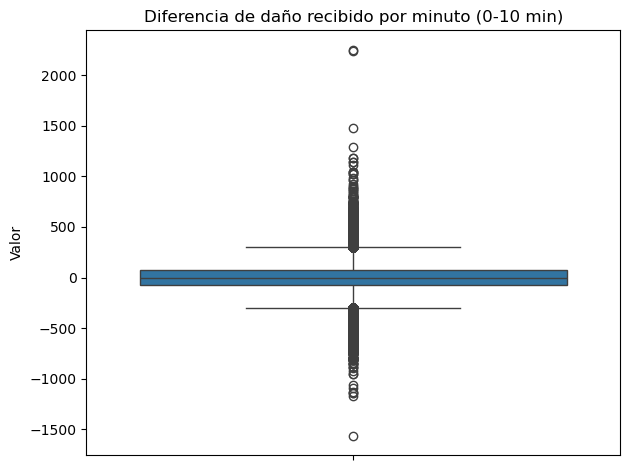

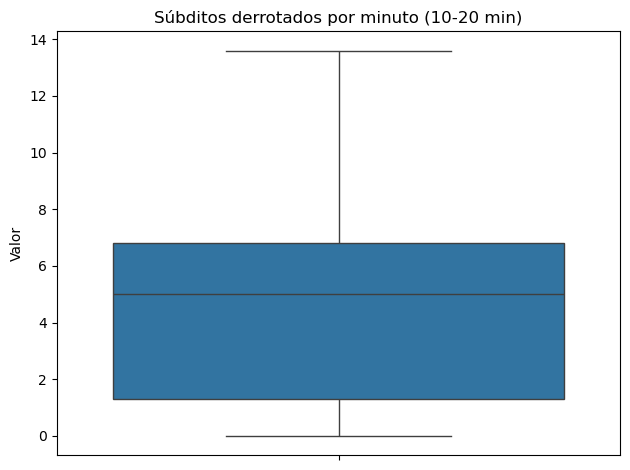

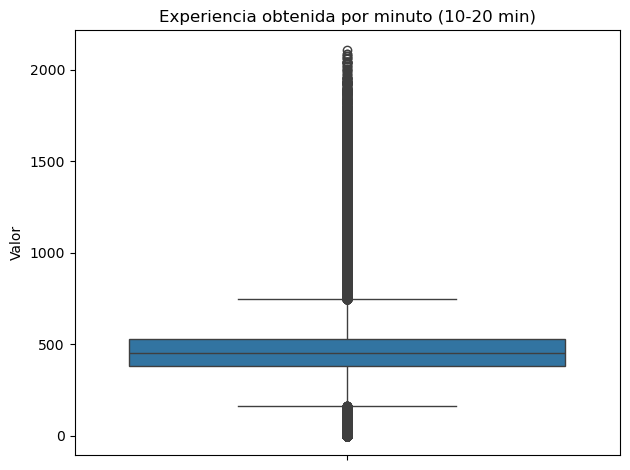

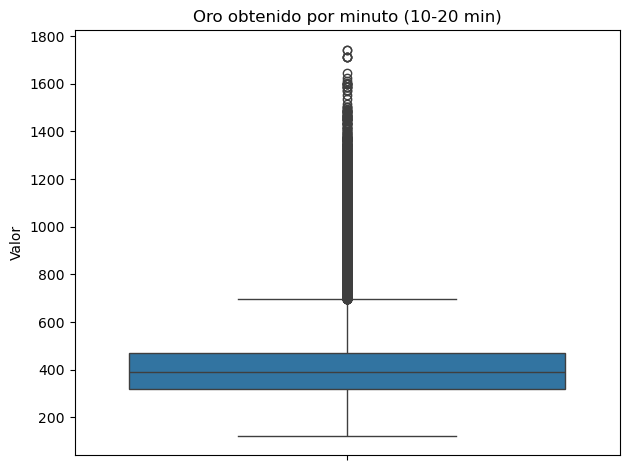

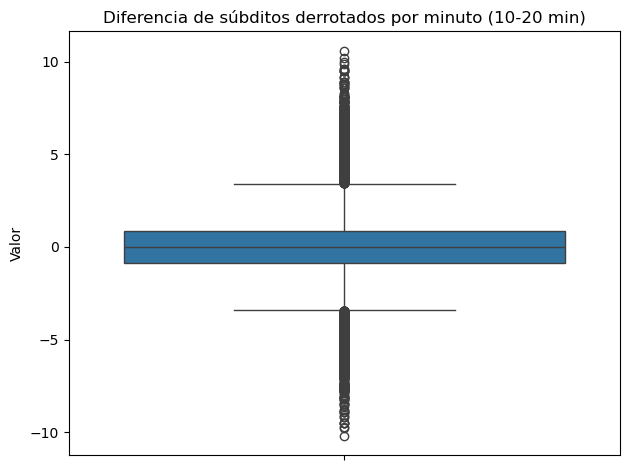

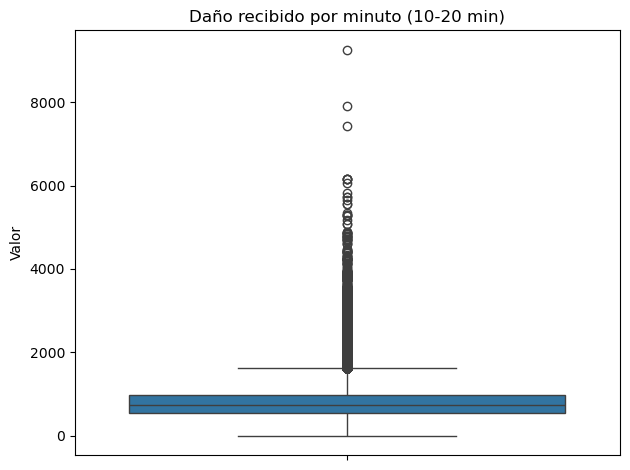

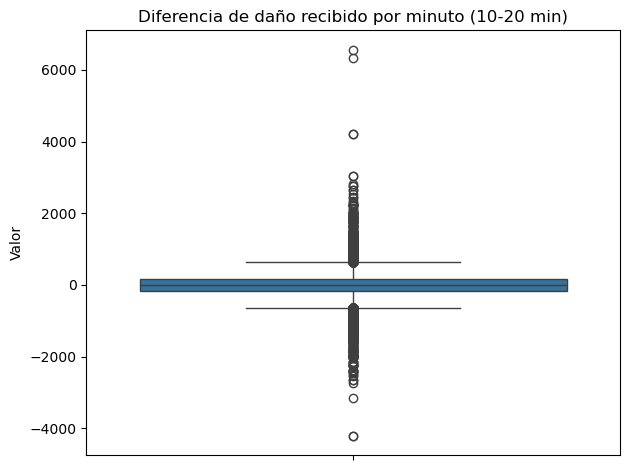

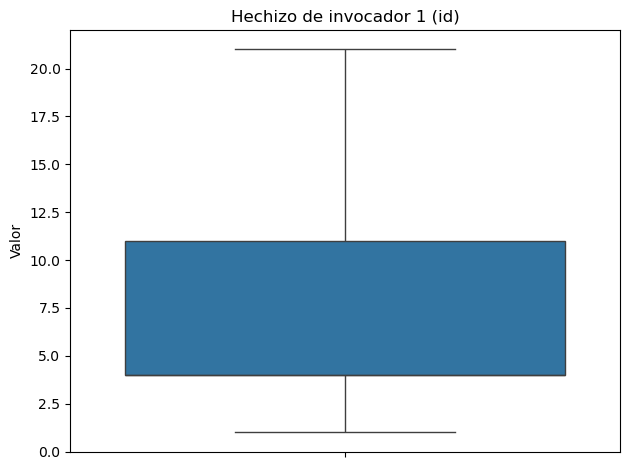

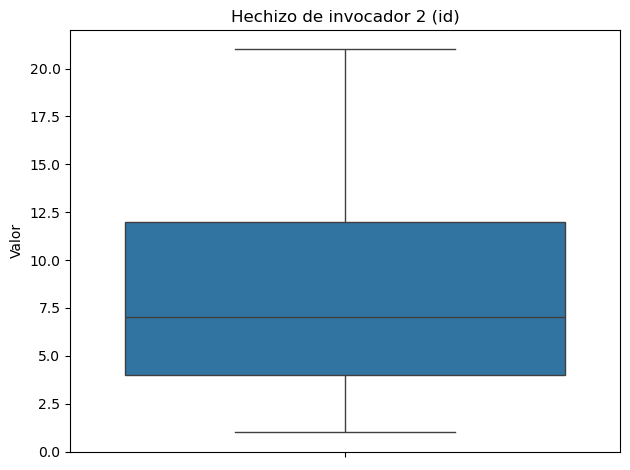

In [14]:
# Check for outliers in numeric columns using boxplots
for col in numeric_columns:
    plt.figure()
    sns.boxplot(df_copy[col], orient='v')
    plt.title(f'{numeric_column_names_for_plot[col]}')
    plt.xlabel('')
    plt.ylabel('Valor')
    plt.tight_layout()
    plt.show()

In [15]:
# Save numeric columns into a list
all_numeric_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()

print("----- Outliers in numeric columns -----")

# Check for outliers using IQR method
# Calculate the IQR for each numeric column and identify outliers
for col in all_numeric_columns:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # The outliers are the values that fall below the lower bound or above the upper bound
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    
    print(f'{col}: {len(outliers)} outliers')    

----- Outliers in numeric columns -----
item0: 0 outliers
creepsPerMinDeltas_010: 0 outliers
xpPerMinDeltas_010: 813 outliers
goldPerMinDeltas_010: 10574 outliers
csDiffPerMinDeltas_010: 11533 outliers
damageTakenPerMinDeltas_010: 3505 outliers
damageTakenDiffPerMinDeltas_010: 7483 outliers
creepsPerMinDeltas_1020: 0 outliers
xpPerMinDeltas_1020: 10191 outliers
goldPerMinDeltas_1020: 8951 outliers
csDiffPerMinDeltas_1020: 7487 outliers
damageTakenPerMinDeltas_1020: 6647 outliers
damageTakenDiffPerMinDeltas_1020: 5636 outliers
spell1Id: 0 outliers
spell2Id: 0 outliers


In [16]:
# One-hot encoding for categorical variables before training the models
categorical_columns = df_copy.select_dtypes(include=['object']).columns
df_copy = pd.get_dummies(df_copy, columns=categorical_columns, drop_first=True) # Apply one-hot encoding

# Check the encoded DataFrame
print("\n----- Encoded DataFrame -----")
print(df_copy.head())


----- Encoded DataFrame -----
   veteran  hotStreak  win.x  item0  firstBloodKill  firstTowerKill  firstTowerAssist  creepsPerMinDeltas_010  xpPerMinDeltas_010  goldPerMinDeltas_010  csDiffPerMinDeltas_010  damageTakenPerMinDeltas_010  damageTakenDiffPerMinDeltas_010  creepsPerMinDeltas_1020  xpPerMinDeltas_1020  goldPerMinDeltas_1020  csDiffPerMinDeltas_1020  damageTakenPerMinDeltas_1020  damageTakenDiffPerMinDeltas_1020  firstBlood  firstTower  firstDragon  firstRiftHerald  spell1Id  spell2Id  tier_CHALLENGER  tier_DIAMOND  tier_GOLD  tier_GRANDMASTER  tier_IRON  tier_MASTER  tier_PLATINUM  tier_SILVER  role_DUO_CARRY  role_DUO_SUPPORT  role_NONE  role_SOLO  lane_JUNGLE  lane_MIDDLE  lane_TOP
0    False      False  False   3157           False           False             False                     0.8               269.4                 227.6                     NaN                        464.0                              NaN                      2.0                333.1            

In [17]:
# Input missing values
# Use KNNImputer to fill in missing values
knn_imputer = KNNImputer(n_neighbors=10) # 10 nearest neighbors for imputation
df_imputed = knn_imputer.fit_transform(df_copy)
df_imputed = pd.DataFrame(df_imputed, columns=df_copy.columns) # Convert back to DataFrame

# Check the number of missing values after imputation
missing_values_after = df_imputed.isnull().sum()
print("Missing values after imputation:", missing_values_after.sum())

# Compare original and imputed DataFrames first few rows
print("\n----- ORIGINAL DF -----")
print(df_copy.head())
print("\n----- IMPUTED DF -----")
print(df_imputed.head())

# Dimensions of the imputed DataFrame
print("\n----- Dimensions of the imputed DataFrame -----")
print(df_imputed.shape, "\n")

# Show the info about the imputed DataFrame
print("----- Info about the imputed DataFrame: -----")
print(df_imputed.info(), "\n")

Missing values after imputation: 0

----- ORIGINAL DF -----
   veteran  hotStreak  win.x  item0  firstBloodKill  firstTowerKill  firstTowerAssist  creepsPerMinDeltas_010  xpPerMinDeltas_010  goldPerMinDeltas_010  csDiffPerMinDeltas_010  damageTakenPerMinDeltas_010  damageTakenDiffPerMinDeltas_010  creepsPerMinDeltas_1020  xpPerMinDeltas_1020  goldPerMinDeltas_1020  csDiffPerMinDeltas_1020  damageTakenPerMinDeltas_1020  damageTakenDiffPerMinDeltas_1020  firstBlood  firstTower  firstDragon  firstRiftHerald  spell1Id  spell2Id  tier_CHALLENGER  tier_DIAMOND  tier_GOLD  tier_GRANDMASTER  tier_IRON  tier_MASTER  tier_PLATINUM  tier_SILVER  role_DUO_CARRY  role_DUO_SUPPORT  role_NONE  role_SOLO  lane_JUNGLE  lane_MIDDLE  lane_TOP
0    False      False  False   3157           False           False             False                     0.8               269.4                 227.6                     NaN                        464.0                              NaN                      2.0    

In [18]:
# Save the imputed DataFrame to a new CSV file
df_imputed.to_csv('prepared_dataset_unfinished_game.csv', index=False)

# Check the saved DataFrame
df_saved = pd.read_csv('prepared_dataset_unfinished_game.csv')
print("\n----- Saved DataFrame -----")
print(df_saved.head())


----- Saved DataFrame -----
   veteran  hotStreak  win.x   item0  firstBloodKill  firstTowerKill  firstTowerAssist  creepsPerMinDeltas_010  xpPerMinDeltas_010  goldPerMinDeltas_010  csDiffPerMinDeltas_010  damageTakenPerMinDeltas_010  damageTakenDiffPerMinDeltas_010  creepsPerMinDeltas_1020  xpPerMinDeltas_1020  goldPerMinDeltas_1020  csDiffPerMinDeltas_1020  damageTakenPerMinDeltas_1020  damageTakenDiffPerMinDeltas_1020  firstBlood  firstTower  firstDragon  firstRiftHerald  spell1Id  spell2Id  tier_CHALLENGER  tier_DIAMOND  tier_GOLD  tier_GRANDMASTER  tier_IRON  tier_MASTER  tier_PLATINUM  tier_SILVER  role_DUO_CARRY  role_DUO_SUPPORT  role_NONE  role_SOLO  lane_JUNGLE  lane_MIDDLE  lane_TOP
0      0.0        0.0    0.0  3157.0             0.0             0.0               0.0                     0.8               269.4                 227.6                  -0.065                        464.0                             8.15                      2.0                333.1            